<a href="https://colab.research.google.com/github/jhan-04/practice_learning/blob/main/04_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files #파일 컴퓨터내에서 불러오기
myfile = files.upload()
#io와 pandas 모듈 import
import io 
import pandas as pd

Saving LogisticRegressionData.csv to LogisticRegressionData.csv


In [4]:
#pd.read_csv로 csv파일 불러오기
dataset = pd.read_csv(io.BytesIO(myfile['LogisticRegressionData.csv'])) #파일명 입력
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
#데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0) #20%테스트로이용


In [6]:
#학습(로지스틱 회귀 모델)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [8]:
#6시간 공부했을 때 예측?
classifier.predict([[6]]) #1이면 합격 예측

array([1])

In [9]:
#불합격할확률, 합격할 확률
classifier.predict_proba([[6]])

array([[0.14150735, 0.85849265]])

In [10]:
#분류 결과 예층 (테스트 세트)
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [11]:
y_test  #실제값

array([1, 0, 1, 0])

In [12]:
classifier.score(x_test,y_test) #모델 평가

0.75

데이터 시각화

In [14]:
x_range=np.arange(min(x),max(x), 0.1)

In [15]:
p=1/(1+np.exp(-(classifier.coef_*x_range+classifier.intercept_))) #y=mx+b, y=classifier.coef_*x_range+classifier.intercept_

In [17]:
p.shape, x_range.shape #형태가 동일해야 그래프 출력가능

((1, 95), (95,))

In [18]:
p=p.reshape(-1) #1차원 배열로 형태를 변경

Text(0, 0.5, 'score')

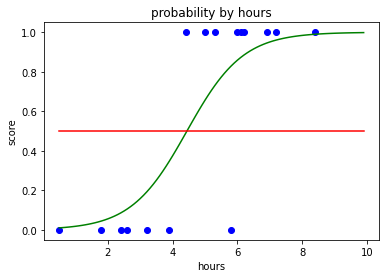

In [21]:
#훈련데이터
plt.scatter(x_train,y_train,color='b')
plt.plot(x_range,p,color='g')
plt.plot(x_range,np.full(len(x_range),0.5),'r')
plt.title('probability by hours')
plt.xlabel('hours')
plt.ylabel('score')

Text(0, 0.5, 'score')

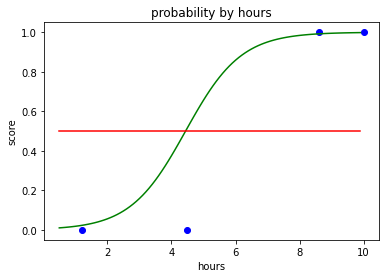

In [22]:
#테스트데이터
plt.scatter(x_test,y_test,color='b')
plt.plot(x_range,p,color='g')
plt.plot(x_range,np.full(len(x_range),0.5),'r')
plt.title('probability by hours')
plt.xlabel('hours')
plt.ylabel('score')

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 불합격 (실제)             불합격 (실제)

# FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)               합격 (실제)

array([[1, 1],
       [0, 2]])